# Data Analysis on HR Employee Attrition

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
data=pd.read_csv('HREmployeeAttrition.csv')

In [144]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [145]:
plt.style.use("seaborn")

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [147]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

As we can see that there are no null values in any of the column however, there are different data types in Dataframe i.e data like integer and strings so for proper analysis we will require Integer data type into our target variable i.e Attrition

### TARGET VARIABLE in this case is 'Attribition'

# PERFORMING EDA

In [148]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We need to map our target variable into integer format 
1-> left the company or attrition
0-> Retained in the company

In [149]:
data["left"] = np.where(data["Attrition"] == "Yes",1,0)

In [150]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,0


In [151]:
import warnings 
warnings.filterwarnings('ignore')

In [152]:
def NV(data,segment_by,target_var = "Attrition"):
    """a function for plotting the distribution of numerical variables and its effect on attrition"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=data, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = data[segment_by], ax=ax[1], kde=False)
    
    plt.show()

In [153]:
def CV(data, segment_by,invert_axis=False,target_var ="left"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig,ax = plt.subplots(ncols=2, figsize =(14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by,data=data,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=data,hue="Attrition",ax=ax[0])
        
    ax[0].set_title("Comparision of"+ segment_by+" vs "+ "Attrition")
    
    #plot the effect of variable on attrition
    if invert_axis== False:
        sns.barplot(x = segment_by,y = target_var ,data=data,ci=None)
    else:
        sns.barplot(y =segment_by,x = target_var ,data=data,ci=None)
        
    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

#### Analyzing the vars
Numeric Vars

# Age

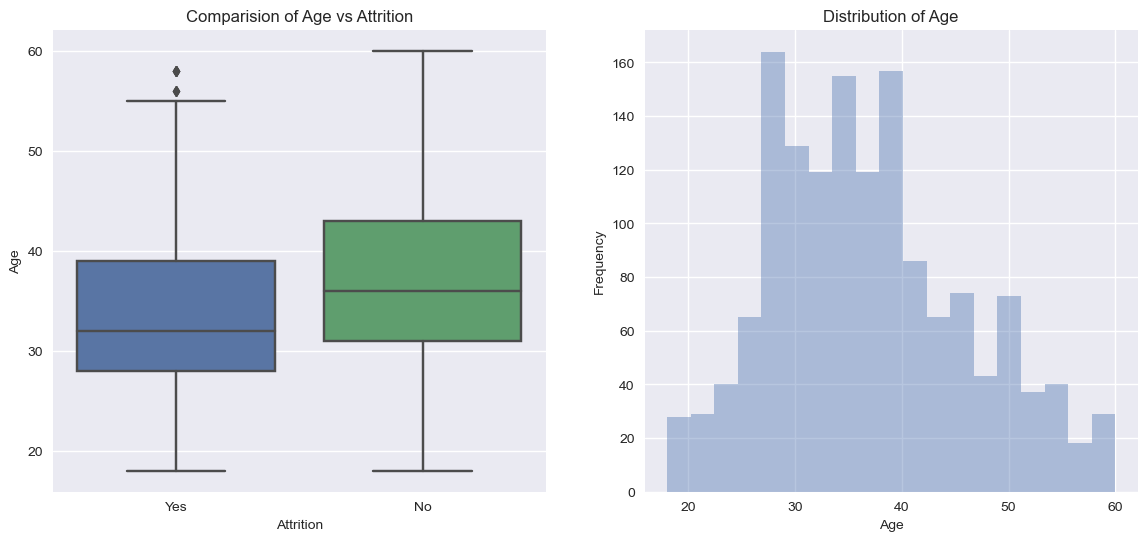

In [154]:
NV(data,segment_by="Age")

- We Found that median age of employee's in the company is 30-40 (36) . min employee age is 18.
- From the Age Comparision boxplot, majority of people who left the company are below 40 yrs and among the people who didnt left   the company are of age 32 to 40 years

### Daily Rate & Montly Income & HourlyRate

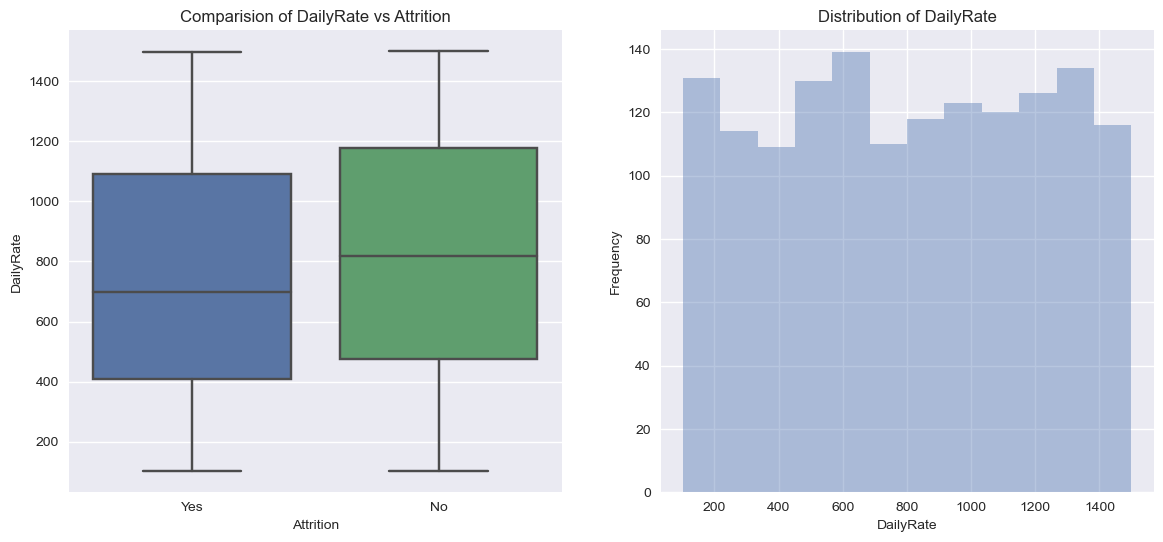

In [155]:
NV(data,segment_by="DailyRate")

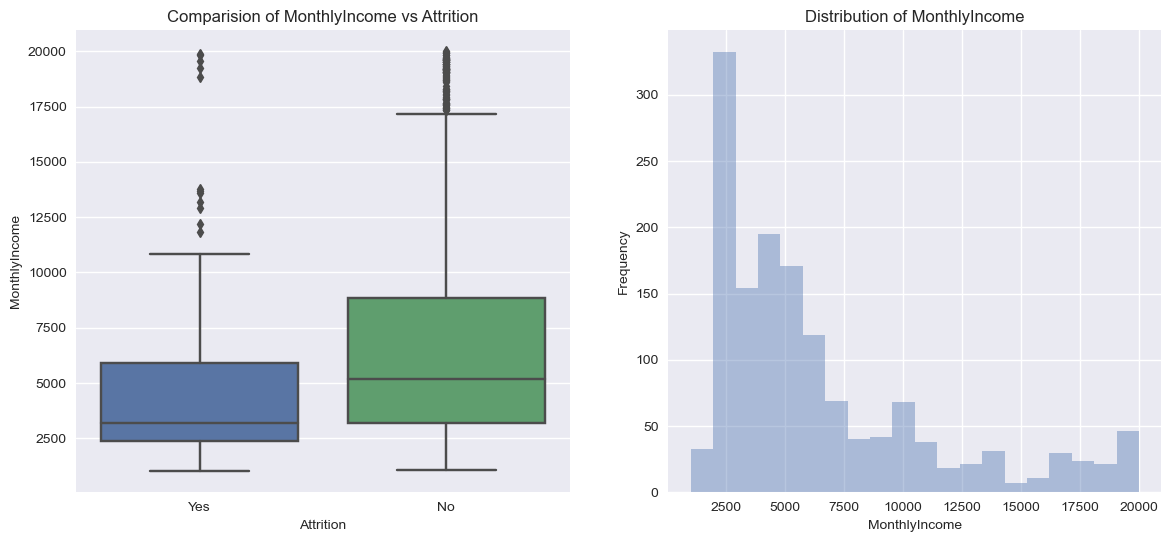

In [156]:
NV(data,segment_by="MonthlyIncome")

- Employee's working with lower daily rates are more prone to leave the company than compared to the employee's working with higher rates. The same trend can be seen with monthly income too.

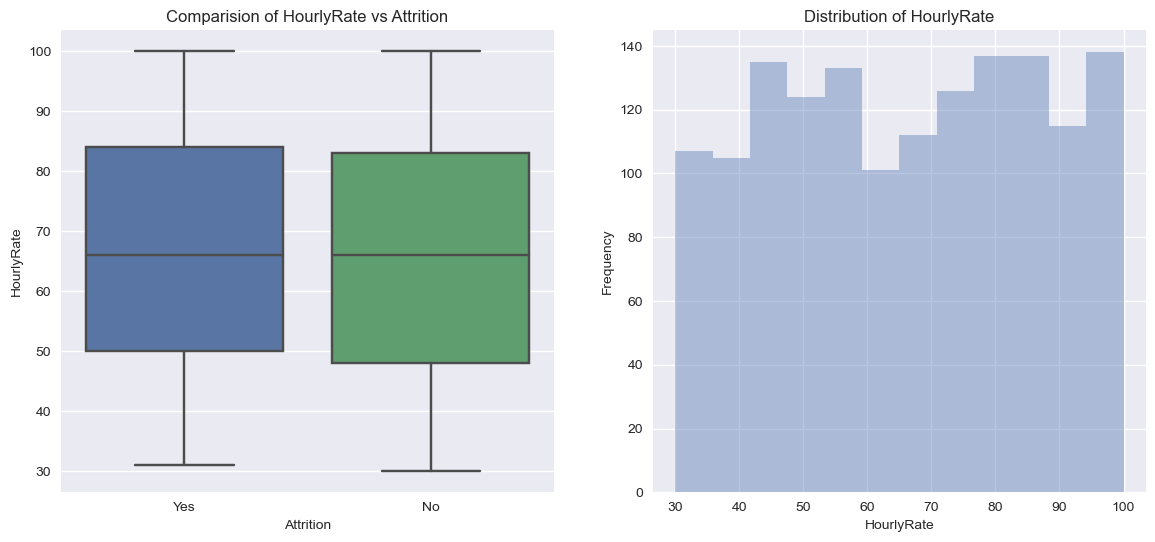

In [157]:
NV(data,segment_by="HourlyRate")

- In the above graphs we can see that there is no major difference in Attrition rate wrt to HourlyRate

### PercentSalaryHike

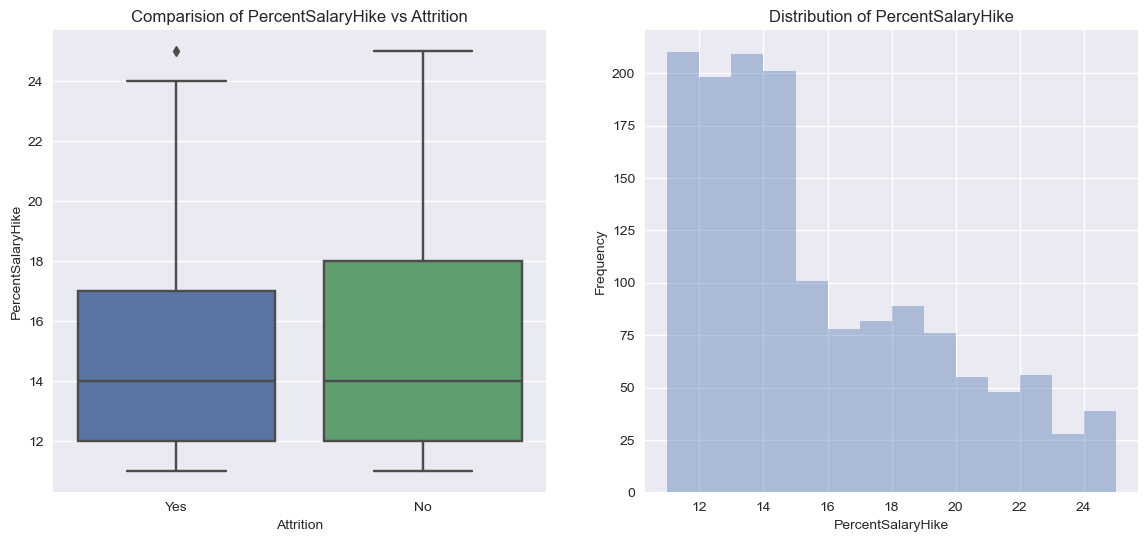

In [158]:
NV(data,segment_by="PercentSalaryHike")

- Majority (60% of total employees) receive 16% salary hike in the company, employee's who received less salary hike have left the company.

### Distance From Home

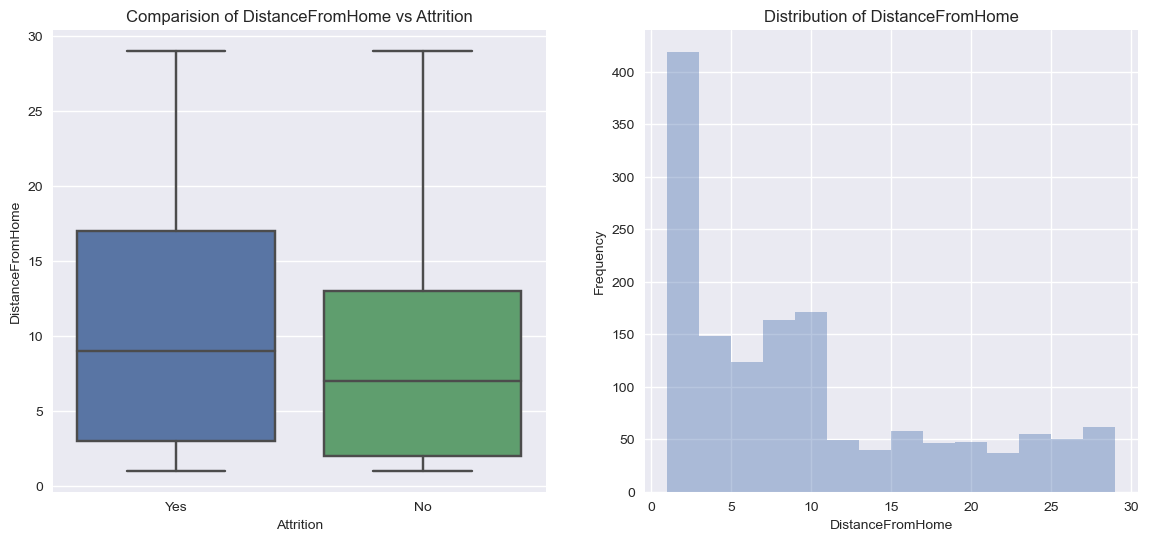

In [159]:
NV(data,segment_by="DistanceFromHome")

- Employee's Living near to the office i.e low distance from the office are less likely to Leave and we can see that the attribition rate is lower in the employe's residing near the Office or workplace.

#### Analyzing vars
Categorical Vars

Creating CrossTable for JobInvolvement and Attrition to Analyse Attrition of employees w.r.t JobInvolvment

In [160]:
pd.crosstab(data.JobInvolvement,data.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [161]:
#calculating the percentage of people having different job involvement rate
round(data.JobInvolvement.value_counts()/data.shape[0] * 100,2)

3    59.05
2    25.51
4     9.80
1     5.65
Name: JobInvolvement, dtype: float64

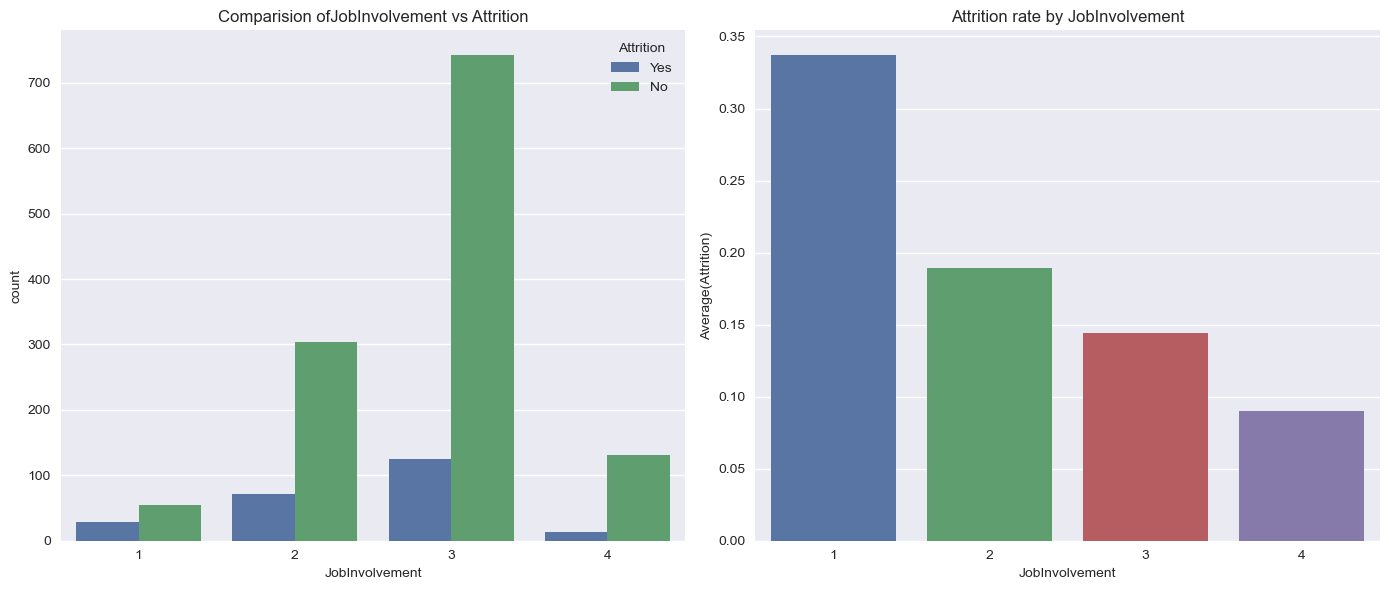

In [162]:
CV(data,"JobInvolvement")

1. In the total data set, 59% have high job involvement whereas 25% have medium involvement rate
2. From above plot we can observe that round 50% of people in low job involvement (level 1 & 2) have left the company.
3. Even the people who have high job involmenent have higher attrition rate around 15% in that category have left company

### JobSatisfaction

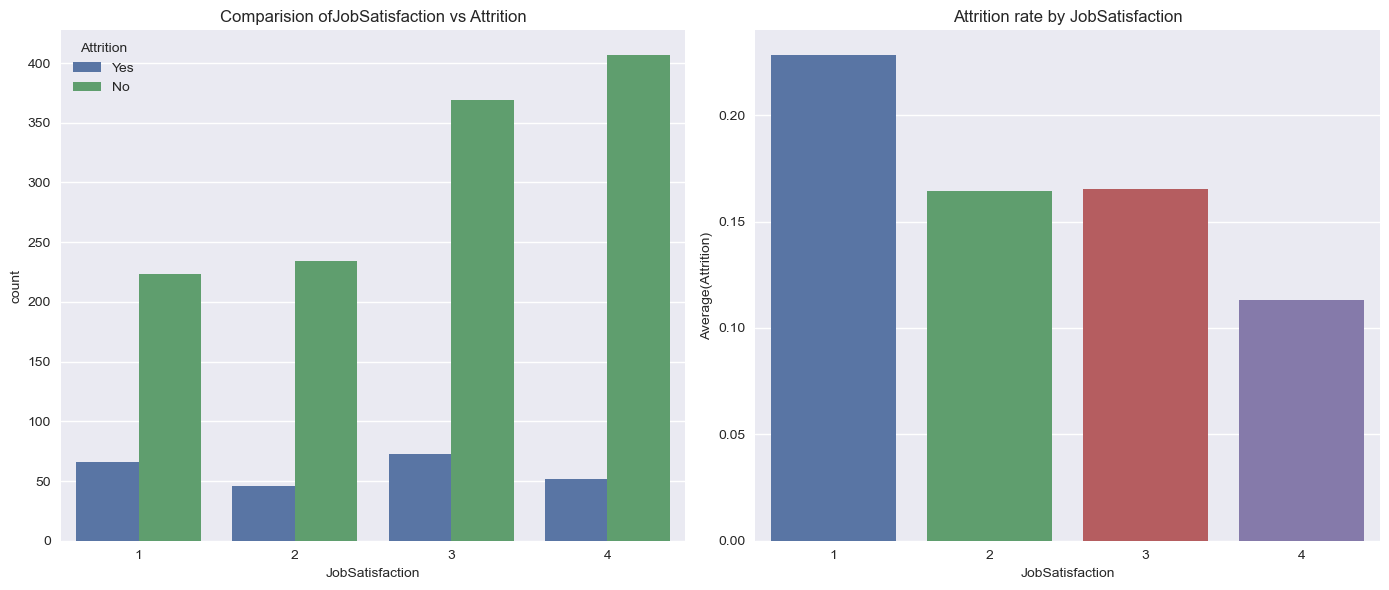

In [163]:
CV(data,"JobSatisfaction")

1. Employees with highest JobSatisfaction are less prone to Attrition and vice-versa
2. Employee's with 2 and 3 job satisfaction have same average levels of Attrition
- As predicted, about 23% of employees with low job satisfaction have left. Surprisingly, 32% of those with medium to high satisfaction have also departed, indicating the existence of other contributing factors.

### Performance Rating

In [164]:
# counting the number of employee's for each ratings
data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

- there are 1244 employees with '3' rating and 226 employees with '4' rating.

In [165]:
#calculating the percentage of employees in each category
round(data.PerformanceRating.value_counts()/data.shape[0] * 100,2)

3    84.63
4    15.37
Name: PerformanceRating, dtype: float64

- around 85 percent of employees are marked as great employees and other 15 percent are marked as outatanding employees

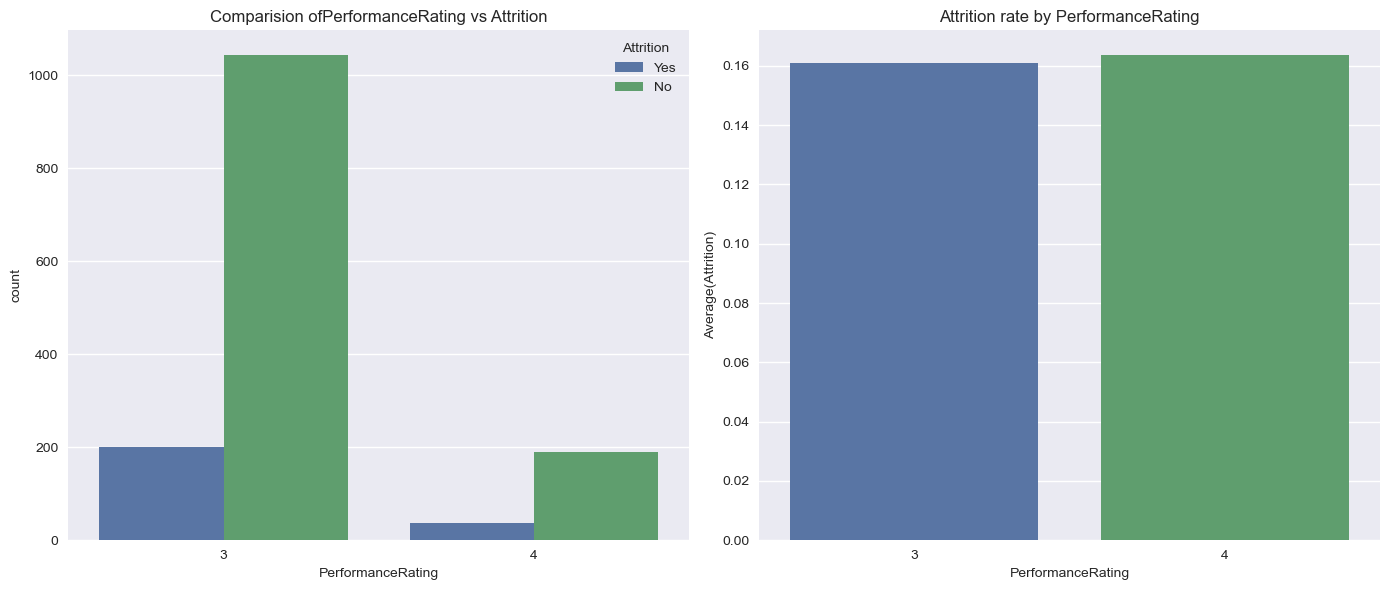

In [166]:
CV(data,"PerformanceRating")

- Despite the common belief that employees with higher performance ratings are less likely to leave the company,analysis reveals that there is no significant difference between performance ratings and attrition rates.

### RelationshipSatisfaction

In [167]:
#percentage of each relationship satisfaction category across the data
round(data.RelationshipSatisfaction.value_counts()/data.shape[0]*100,2)

3    31.22
4    29.39
2    20.61
1    18.78
Name: RelationshipSatisfaction, dtype: float64

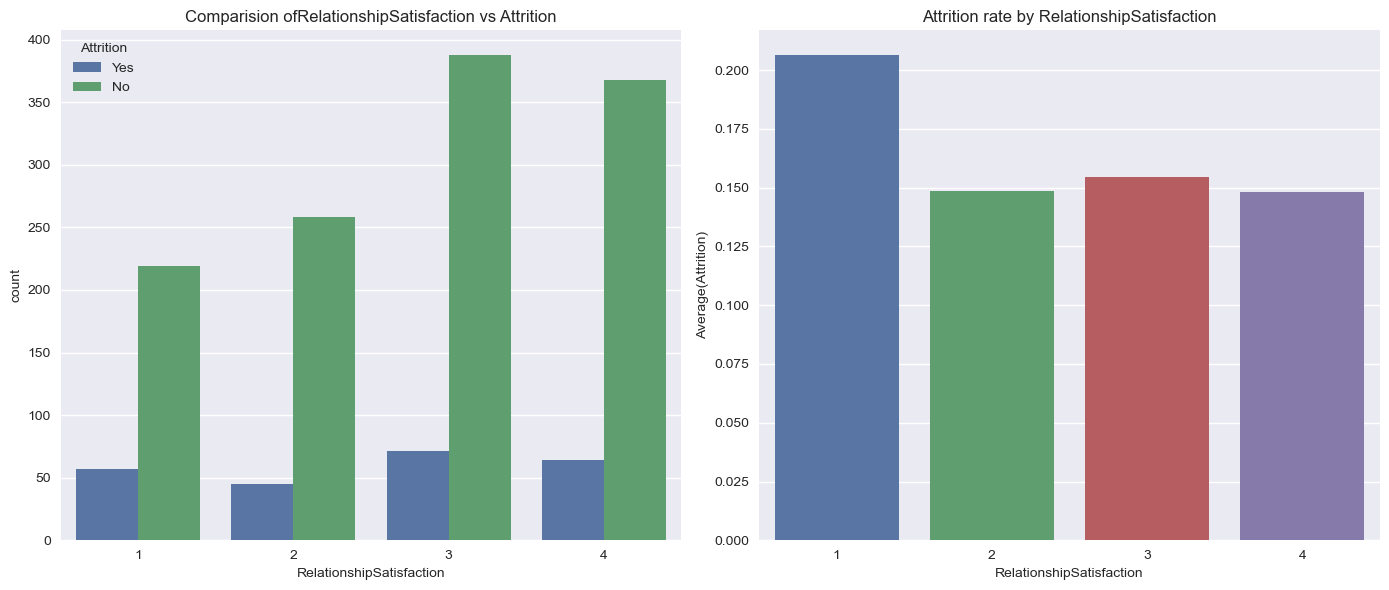

In [168]:
CV(data,"RelationshipSatisfaction")

Contrary to expectations, our analysis shows that approximately 30% of employees with high and very high Relationship Satisfaction have left the company. Surprisingly, there is no discernible trend between Relationship Satisfaction and the attrition rate.

### WorkLifeBalance


In [169]:
#percentage of worklife balance rating across the company data
round(data.WorkLifeBalance.value_counts()/data.shape[0]*100,2)

3    60.75
2    23.40
4    10.41
1     5.44
Name: WorkLifeBalance, dtype: float64

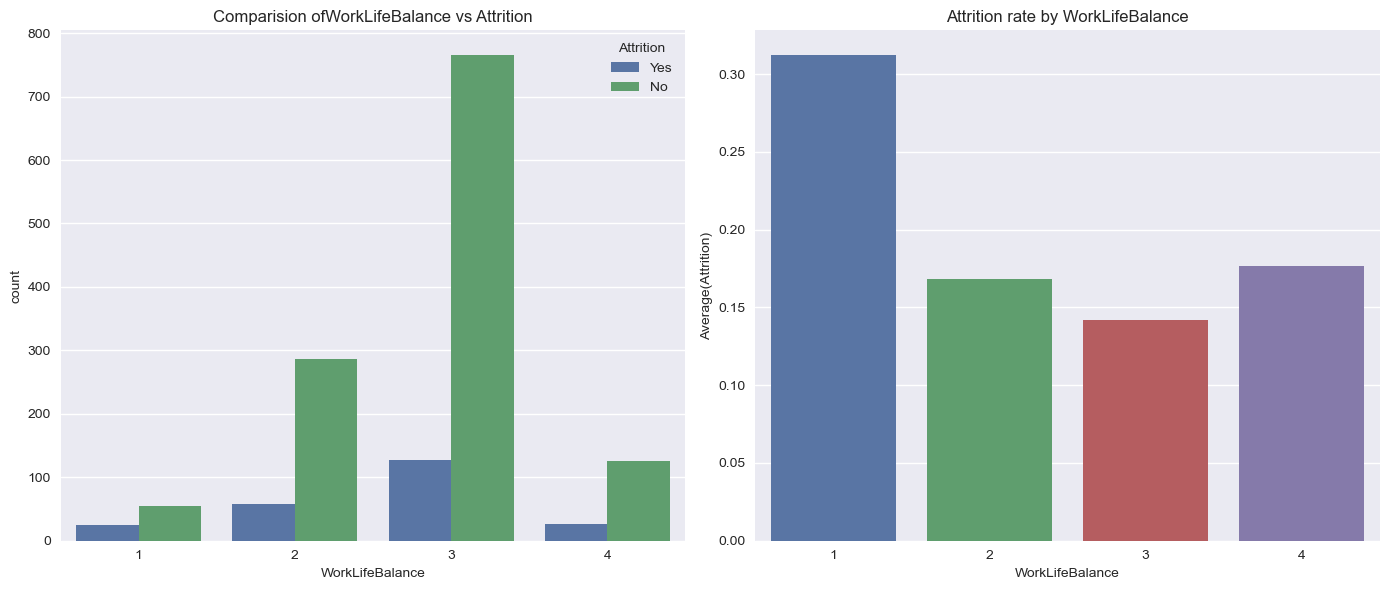

In [170]:
CV(data,"WorkLifeBalance")

- about 30% of employees employees with bad WorkLife have left the company also employees with around 17% of ratio with Best WorkLifeBalance have too left the company

### OverTime

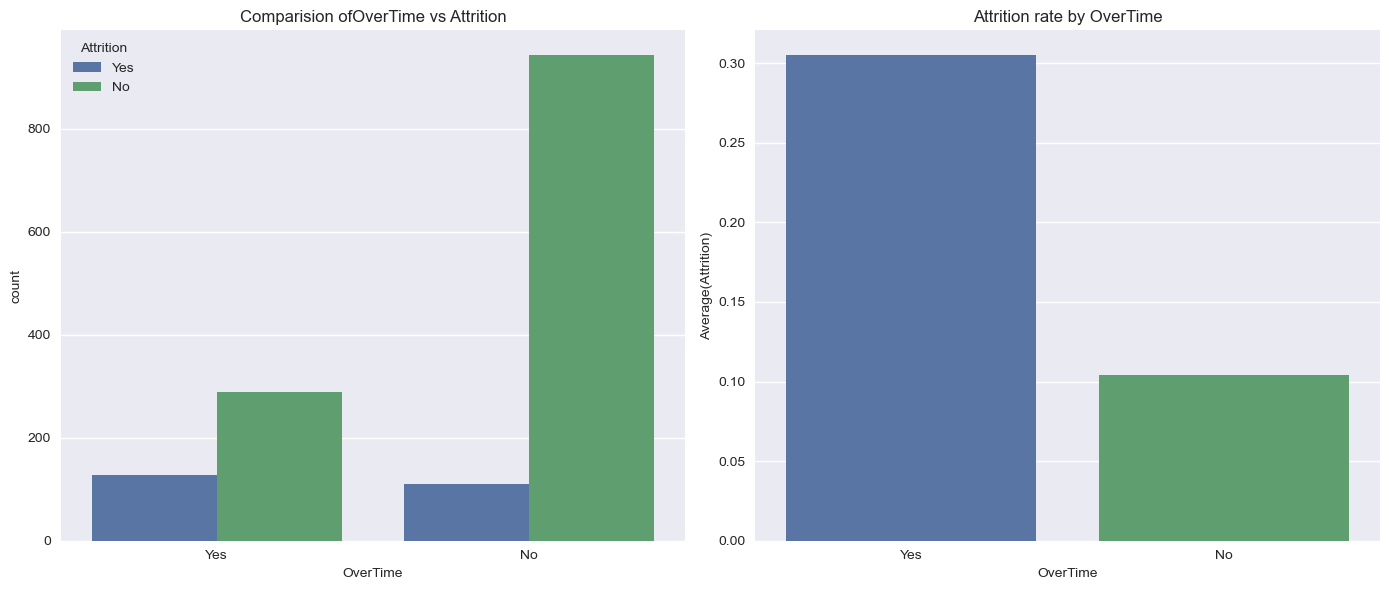

In [171]:
CV(data,"OverTime")

- as we can see that 30% of employees who did OverTime left and 11% of employees who did not OverTime still left. so it is also a strong indicator of attribition in the company


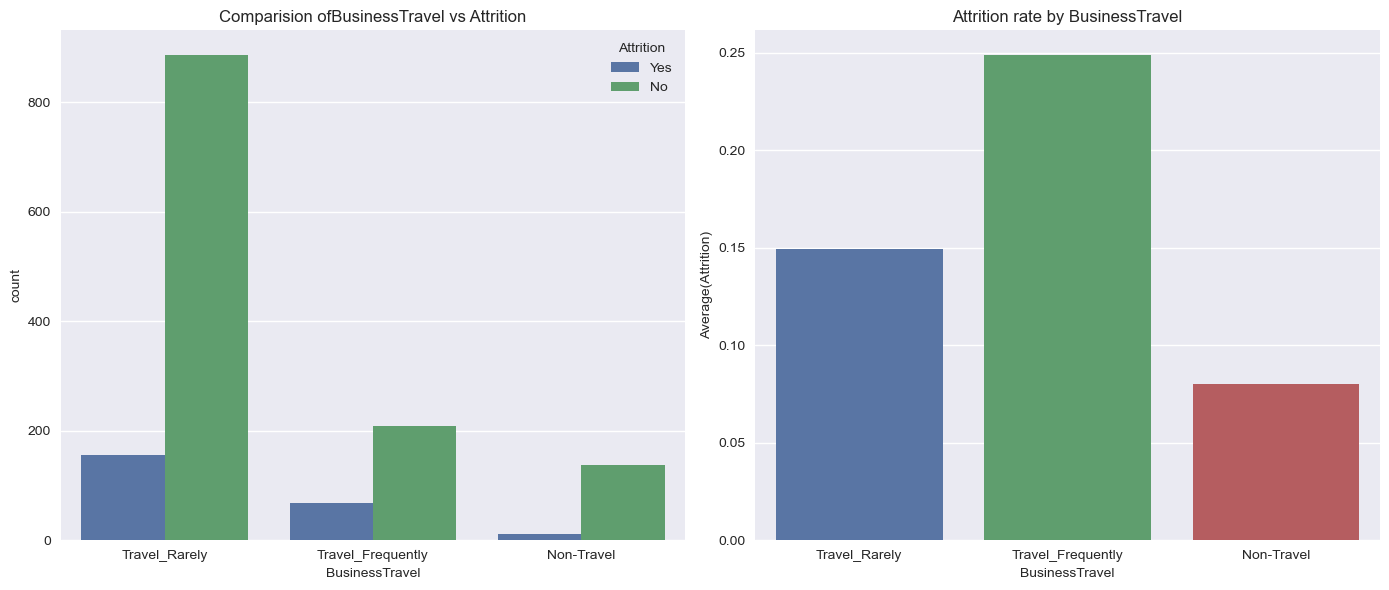

In [172]:
CV(data,"BusinessTravel")

- in the above graph we can see that the Employee's who have to Travel_FrequentlyBusinessTravel tend to leave the company about 30%

### Department

In [173]:
data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

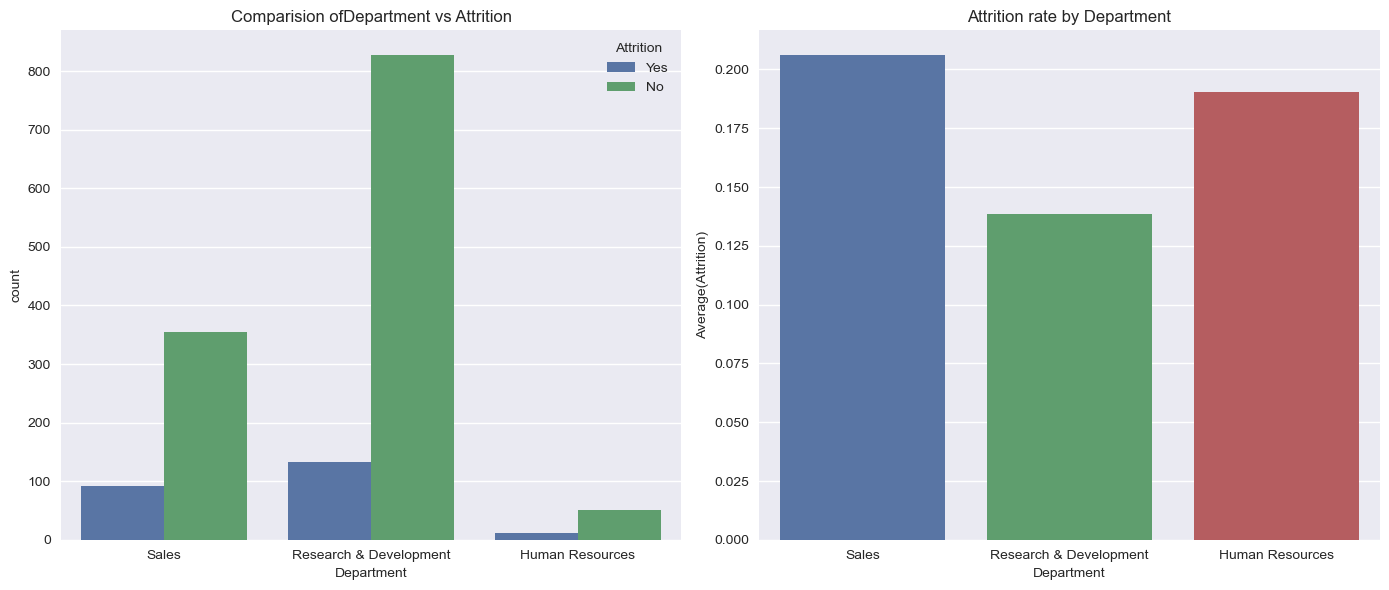

In [174]:
CV(data,"Department")

- HR department shows a marginal increase in turnover, while Sales department experiences a significant 39% turnover rate. Notably, R&D boasts a low attrition rate of 67%, indicating job stability.
- Sales witnesses the highest attrition at 20.6%, followed by HR with approximately 18% turnover.

### EducationField

In [175]:
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

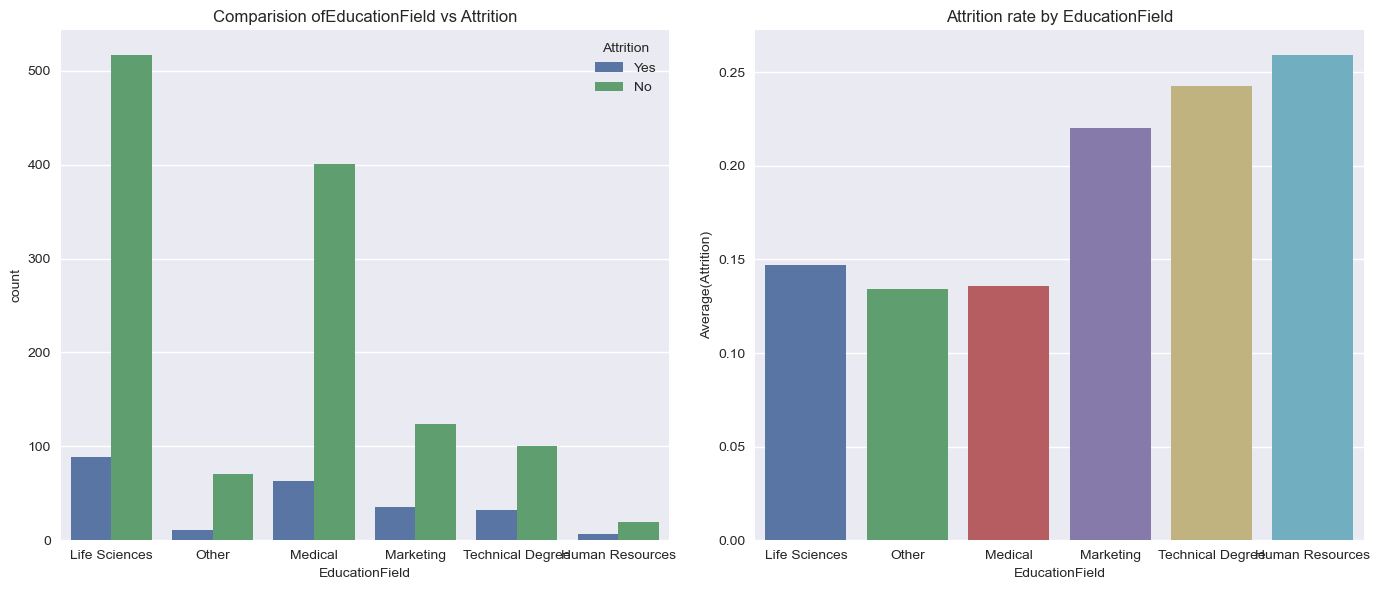

In [176]:
CV(data,"EducationField")


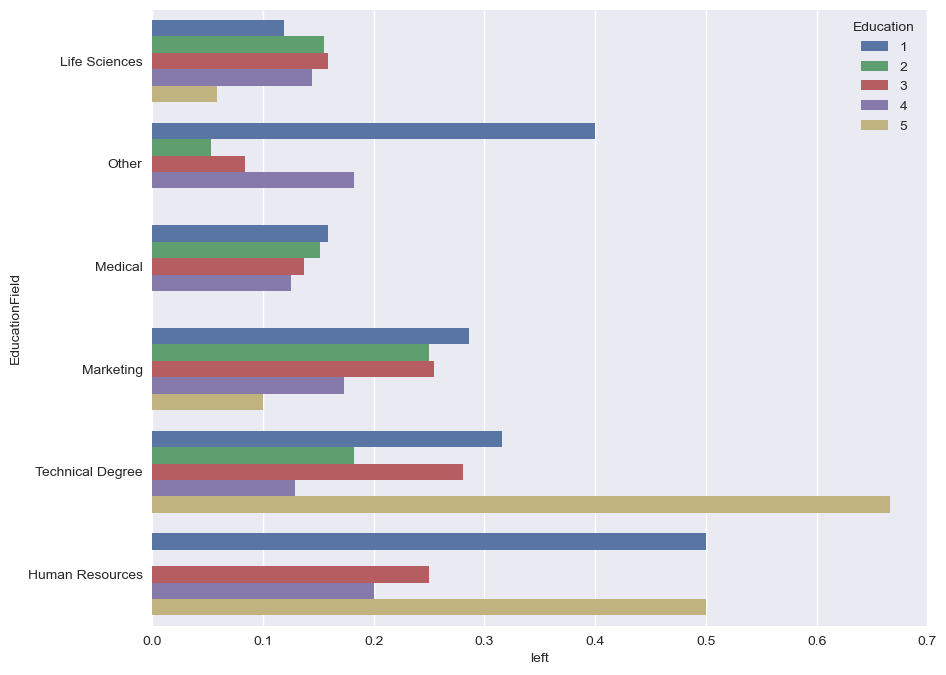

In [177]:
plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "left", hue="Education", data=data,ci=None)
plt.show()

- the Atrrition rate in the HR field is highest arounf 27%
- Also with Technical Degree and Marketing marks about 46%
- Employee's with High education level in the field are more likely to leave the job


### EnvironmetnSatisfaction 

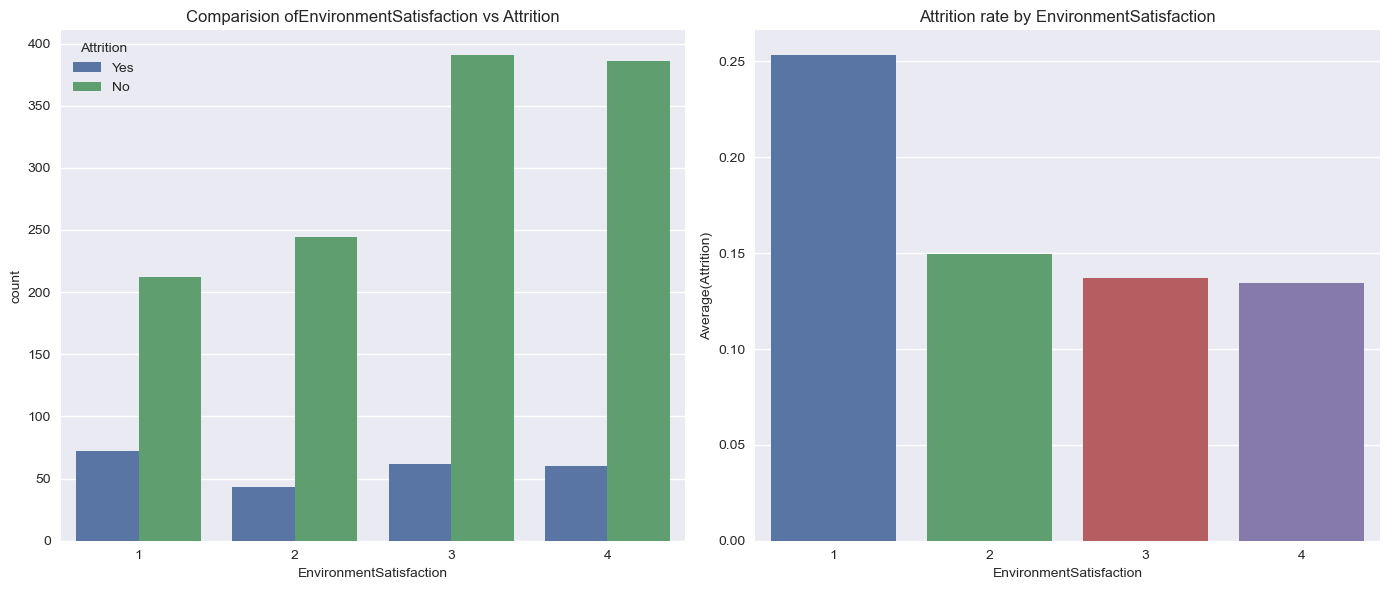

In [178]:
CV(data,"EnvironmentSatisfaction")

- From the graph we can conclude that the EnvironmentSatuisfaction is inversely Propertional to the Attrition.

## Gender vs Attrition

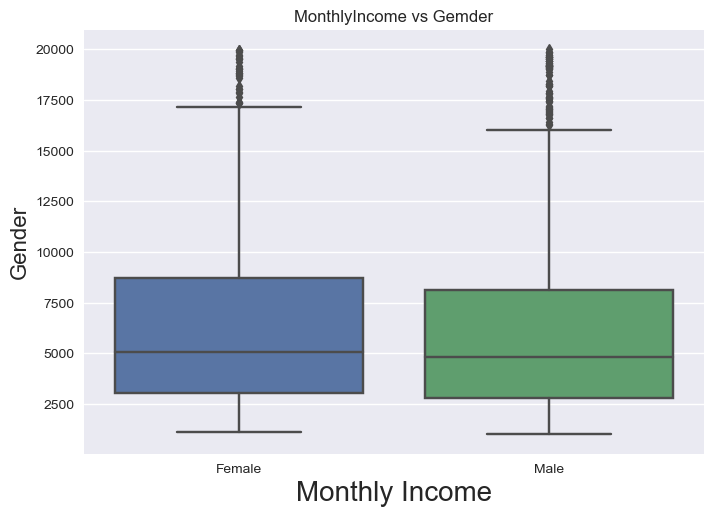

In [179]:
sns.boxplot(x='Gender', y='MonthlyIncome', data=data)
plt.title('MonthlyIncome vs Gemder')
plt.xlabel('Monthly Income',fontsize=20)
plt.ylabel('Gender',fontsize=16)
plt.show()

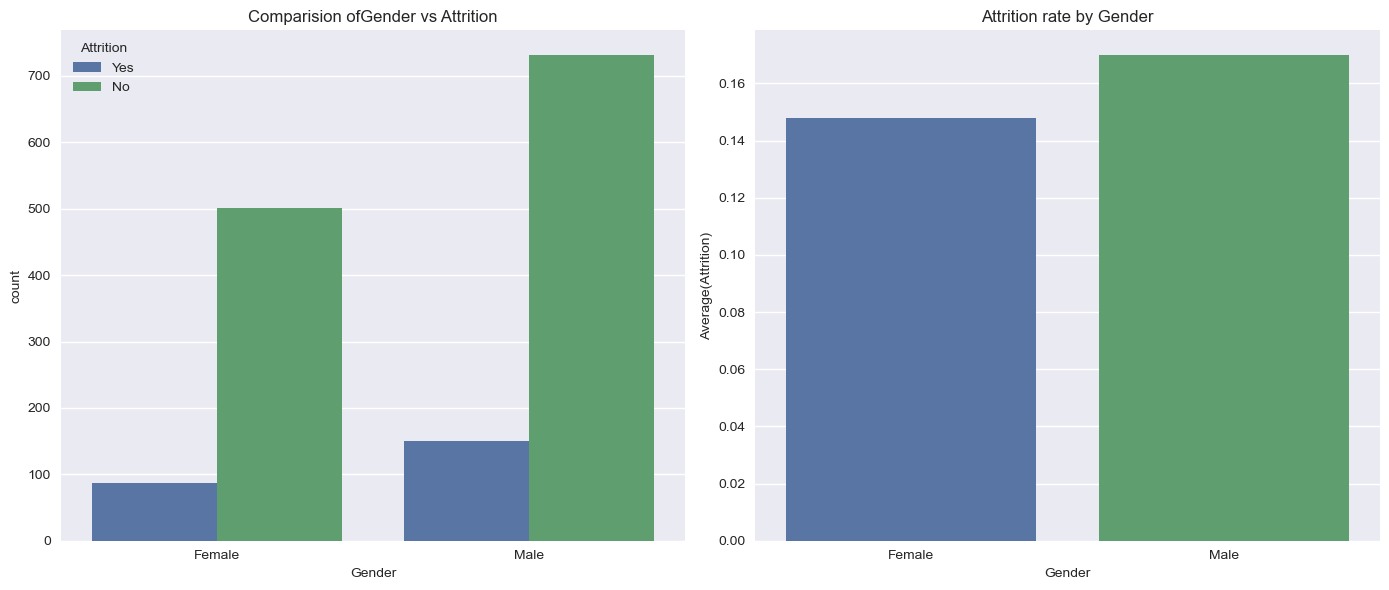

In [180]:
CV(data,"Gender")

-The distribution of monthly income is similar for both genders, indicating nearly identical attrition rates of around 15%. Therefore, gender appears to be a weak indicator of attrition in our analysis.

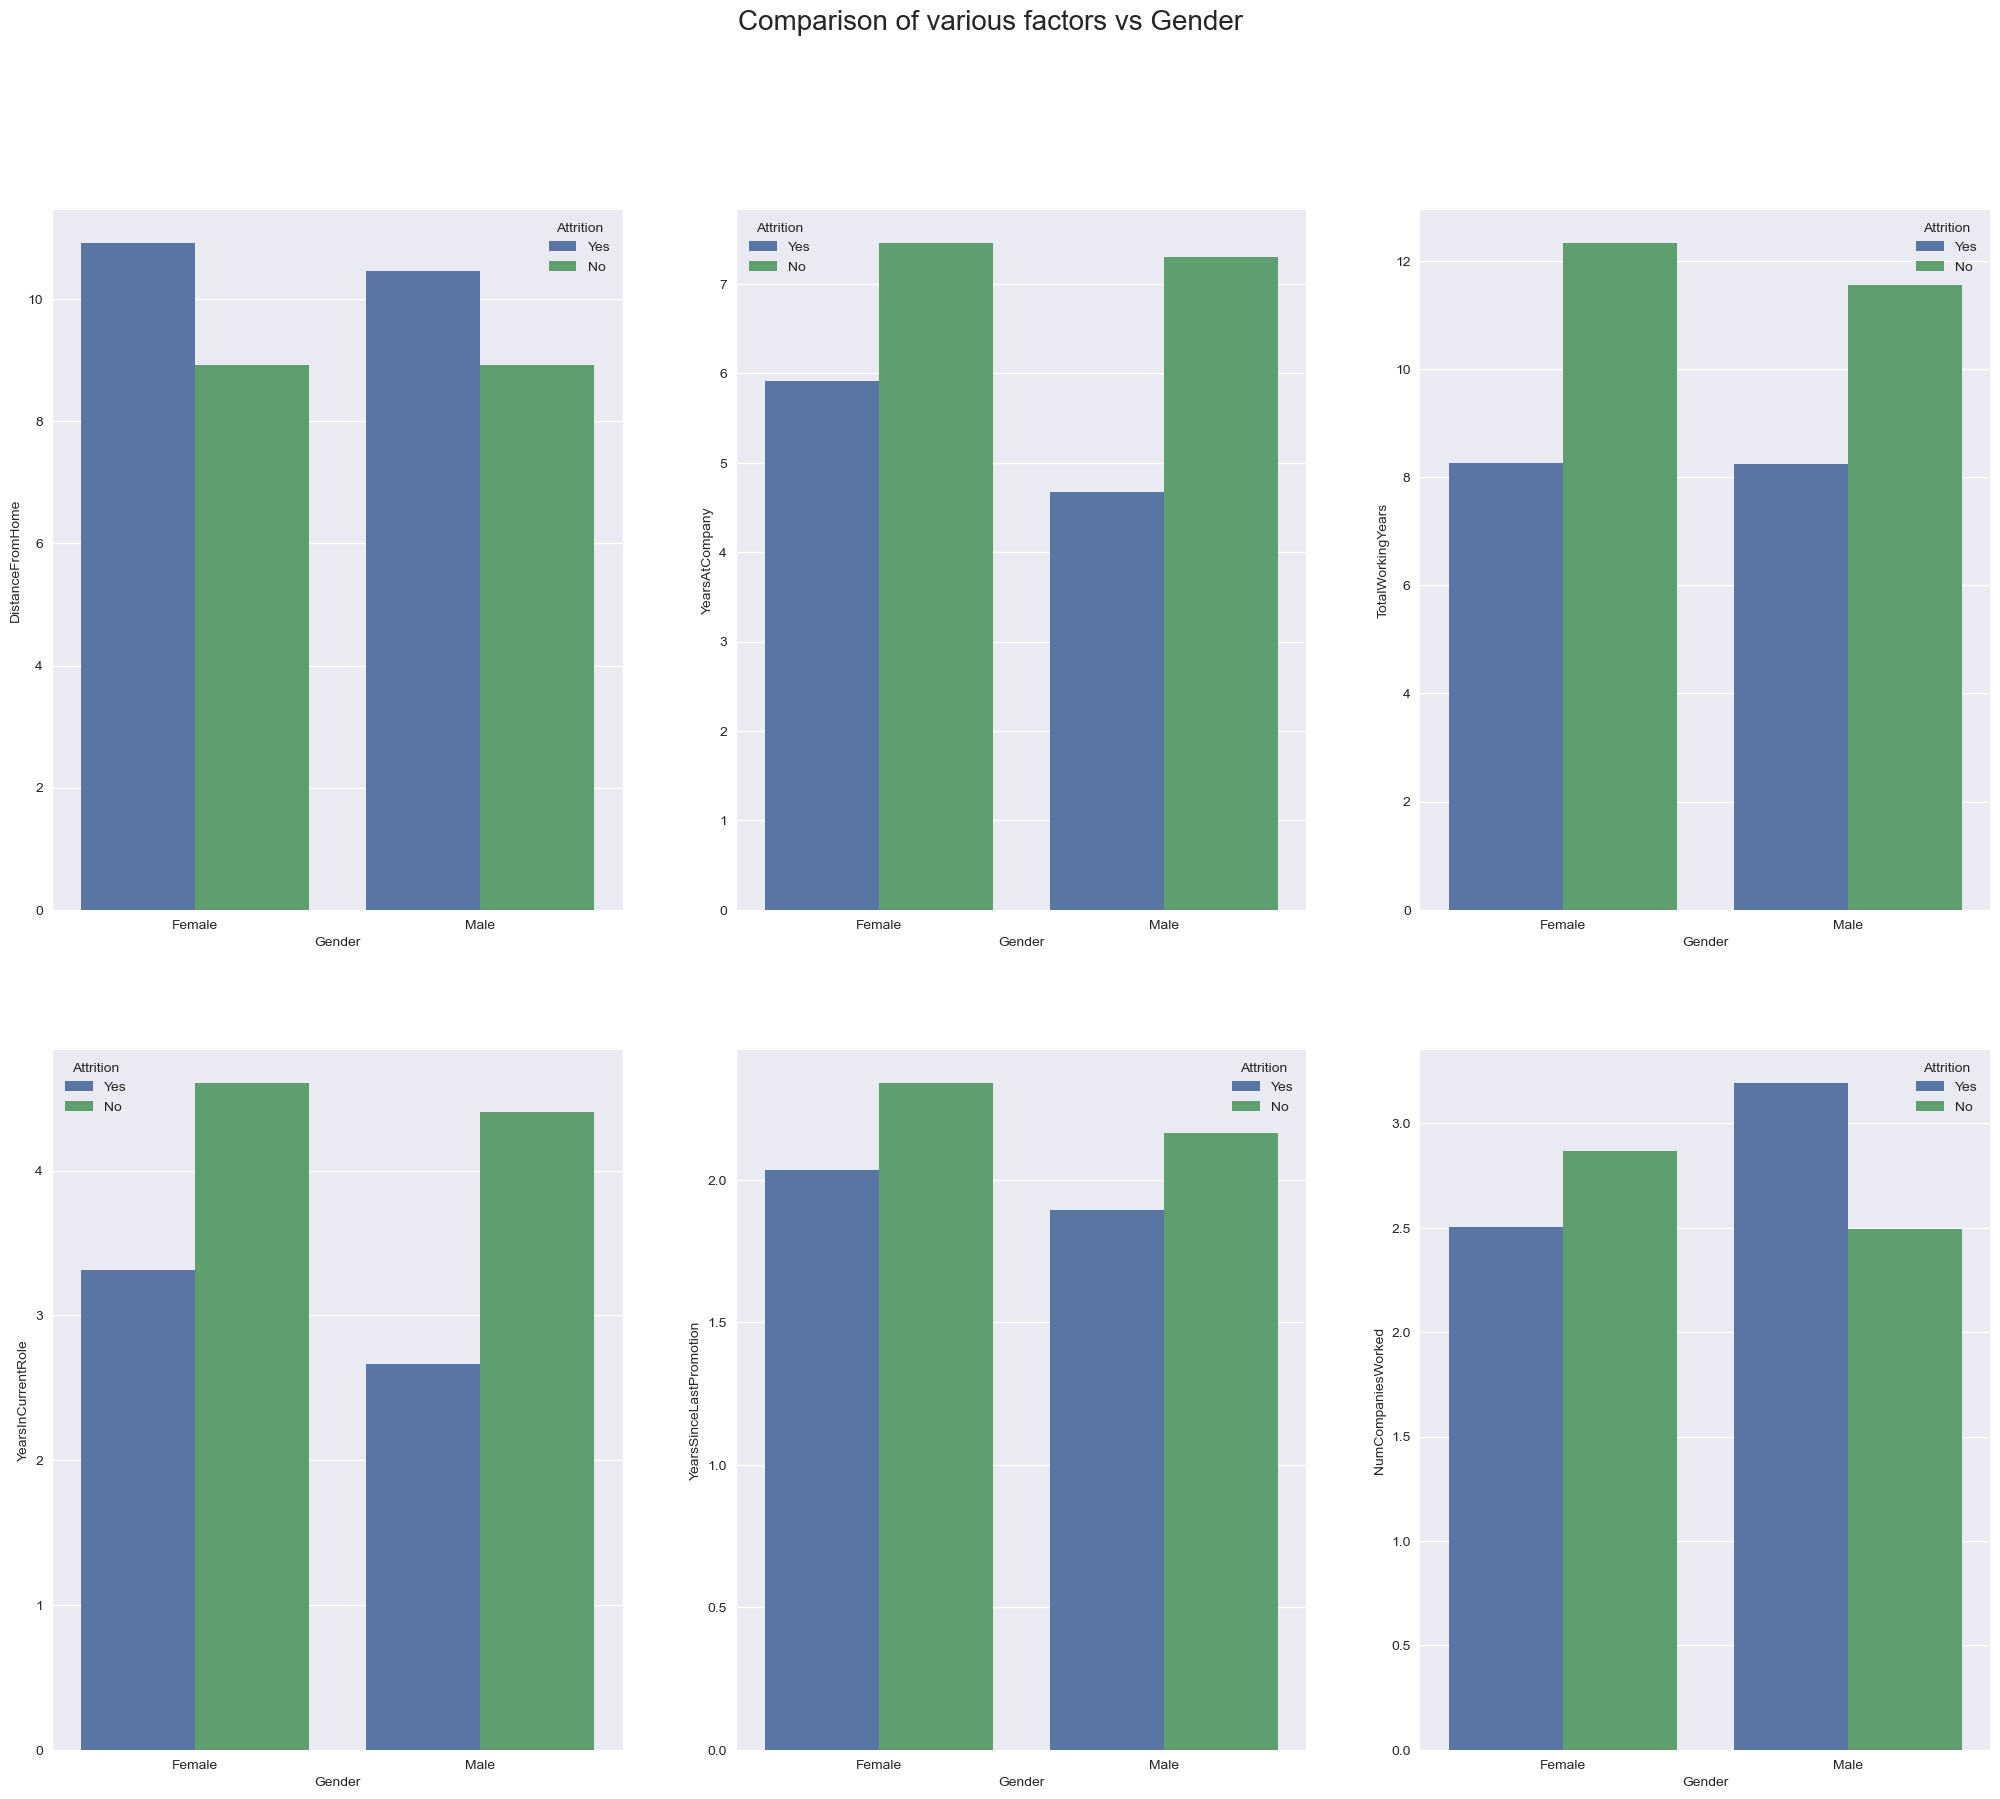

In [181]:
fig, ax = plt.subplots(2, 3, figsize=(25, 20))  # Increase the width in figsize
plt.suptitle("Comparison of various factors vs Gender", fontsize=20)

sns.barplot(x='Gender', y='DistanceFromHome', hue='Attrition', data=data, ax=ax[0, 0], ci=None, width=0.8)
sns.barplot(x='Gender', y='YearsAtCompany', hue='Attrition', data=data, ax=ax[0, 1], ci=None, width=0.8)
sns.barplot(x='Gender', y='TotalWorkingYears', hue='Attrition', data=data, ax=ax[0, 2], ci=None, width=0.8)
sns.barplot(x='Gender', y='YearsInCurrentRole', hue='Attrition', data=data, ax=ax[1, 0], ci=None, width=0.8)
sns.barplot(x='Gender', y='YearsSinceLastPromotion', hue='Attrition', data=data, ax=ax[1, 1], ci=None, width=0.8)
sns.barplot(x='Gender', y='NumCompaniesWorked', hue='Attrition', data=data, ax=ax[1, 2], ci=None, width=0.8)

plt.show()


- Women employees seem to place higher importance on proximity to the workplace compared to men.
- Female employees exhibit longer tenures within a single company than their male counterparts.
- Female employees with extended durations in their current company show a higher inclination towards considering job switches.

### JobRole

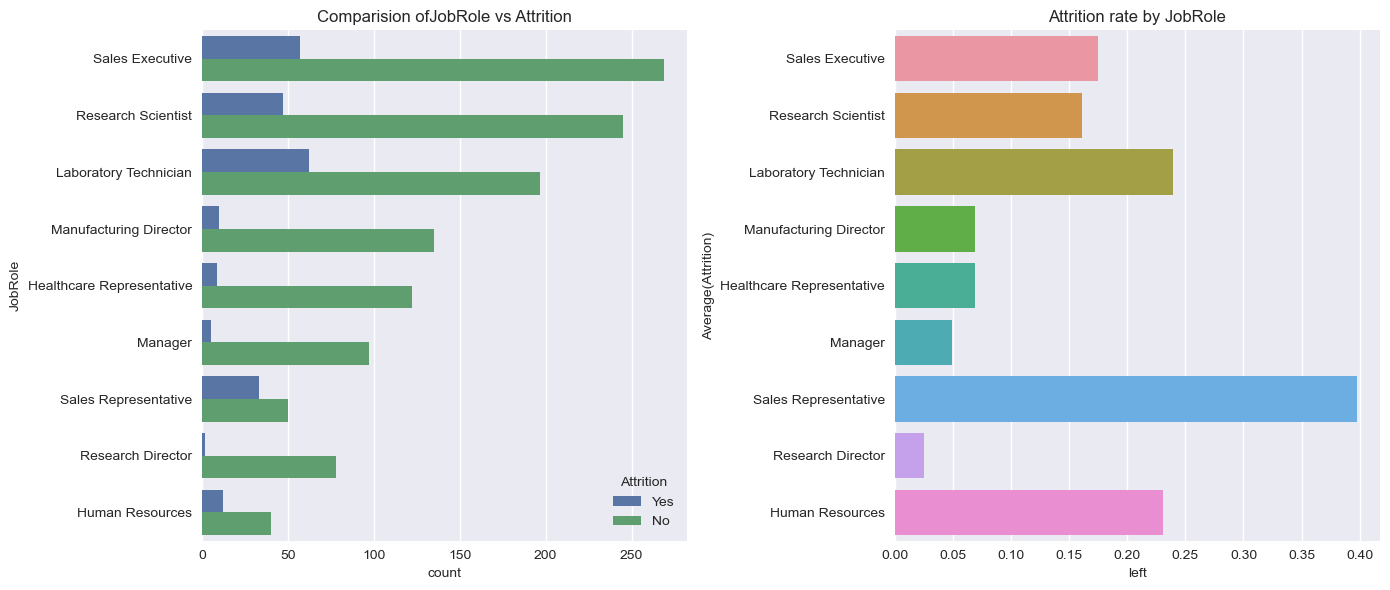

In [182]:
CV(data,"JobRole",invert_axis=True)

1. Sales Executive is the most common job role, followed by R&D and Laboratory Technician.
2. The Sales department experiences the highest attrition rate at 40%, followed by Laboratory Technicians at 24%, and Human Resources at 22%.
3. Motst Attrition in Sales Repersentatives

### Marital Status


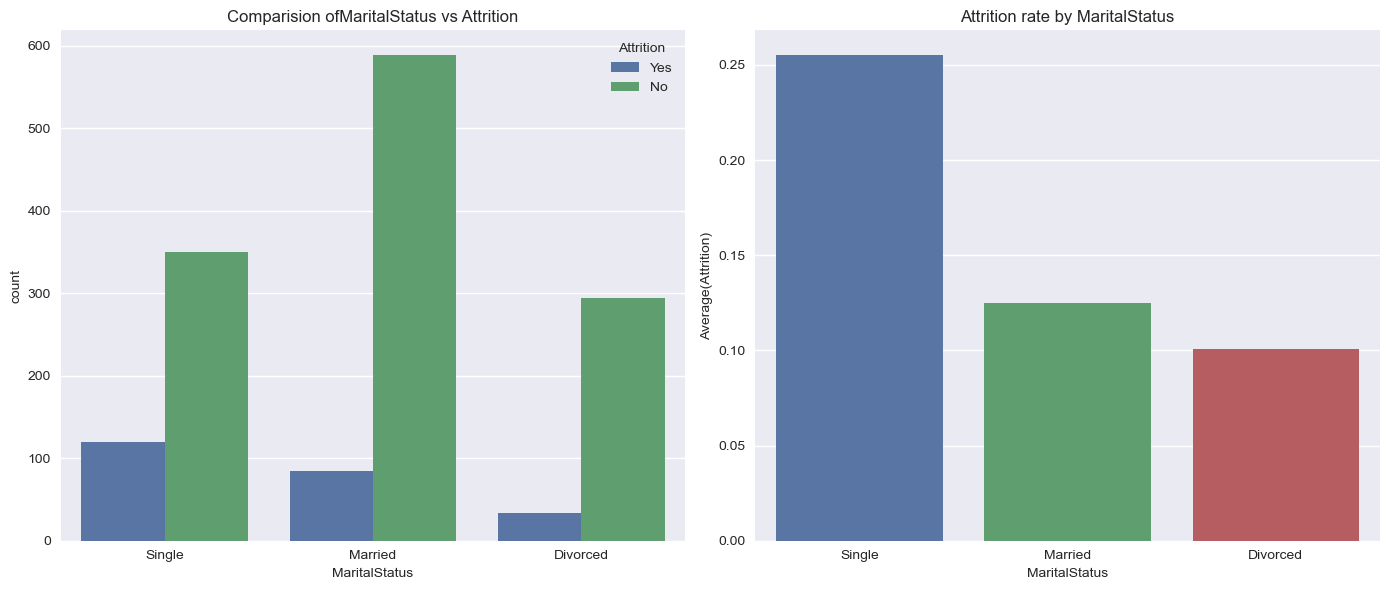

In [183]:
CV(data,"MaritalStatus")

- Marital Status is not a strong factor for attrition